In [56]:
import autograd.numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
%matplotlib inline

In [57]:
X_subset = np.array([np.genfromtxt('./MNist_csv_raw/MNIST{}.csv'.format(i),delimiter=',')[1:,1:] for i in range(10000)])
y_subset = np.genfromtxt('./MNist_csv_raw/MNIST_y.csv',delimiter=',')[1:,1:]
y_subset = y_subset.astype(int)
y_subset = y_subset.flatten()
X_subset = X_subset.reshape((X_subset.shape[0], -1))

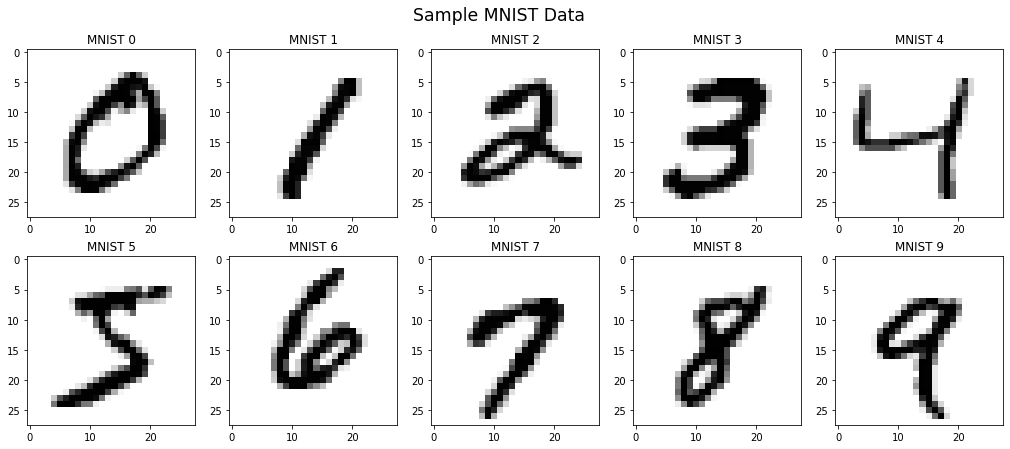

In [91]:
# Visualize some samples from the training dataset
fig, ax = plt.subplots(2, 5, figsize=(17.5, 7))
for i in range(5):
    ax[0, i].imshow(X_subset[y_subset == i][0].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax[0,i].set_title(r'MNIST {}'.format(i))
    ax[1, i].imshow(X_subset[y_subset == i+5][0].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax[1,i].set_title(r'MNIST {}'.format(i+5))
fig.suptitle(r'Sample MNIST Data',y=0.96,size='xx-large')
plt.show()

In [59]:
n_train = 3000

X_train, y_train = X_subset[:n_train], y_subset[:n_train]
X_test, y_test = X_subset[-n_train:], y_subset[-n_train:]

model = LogisticRegression(C=1., penalty='l2', solver='saga', tol=0.1)
model.fit(X_train, y_train)
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
display(Markdown(r'Our trained classifier correctly classifies {:.2f}% of our training data.'.format(100*acc_train)))
display(Markdown(r'Our trained classifier correctly classifies {:.2f}% of our test data.'.format(100*acc_test)))

Our trained classifier correctly classifies 93.90% of our training data.

Our trained classifier correctly classifies 88.27% of our test data.

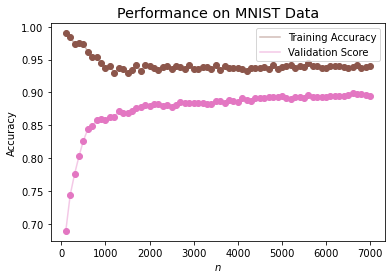

In [101]:
ns = [100*(i+1) for i in range(70)]
trains = np.zeros(70)
tests = np.zeros(70)
for i, n in enumerate(ns):
    X_tr, y_tr = X_subset[:n], y_subset[:n]
    model = LogisticRegression(C=1., penalty='l2', solver='saga', tol=0.1)
    model.fit(X_tr, y_tr)
    trains[i] = model.score(X_tr, y_tr)
    tests[i] = model.score(X_test, y_test)
    
plt.plot(ns,trains,label=r'Training Accuracy', alpha=0.4, color='C5')
plt.scatter(ns,trains,color='C5')
plt.plot(ns,tests,label=r'Validation Score', alpha=0.4, color='C6')
plt.scatter(ns,tests,color='C6')
plt.xlabel(r'$n$')
plt.ylabel(r'Accuracy')
plt.title(r'Performance on MNIST Data',size='x-large')
plt.legend()
plt.show()

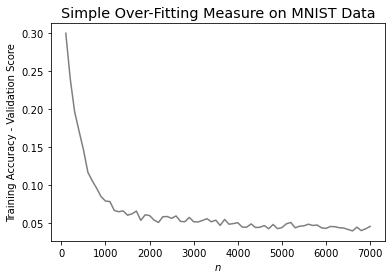

In [122]:
diffs = trains - tests
plt.plot(ns,diffs,color='C7')
plt.xlabel(r'$n$')
plt.ylabel(r'Training Accuracy - Validation Score')
plt.title(r'Simple Over-Fitting Measure on MNIST Data',size='x-large')
plt.show()

In [61]:
X_subset_masked = np.array([np.genfromtxt('./MNist_csv_50pcentMasked/MNIST{}.csv'.format(i),delimiter=',')
                            for i in range(10000)])
X_subset_masked = X_subset_masked.reshape((X_subset.shape[0], -1))

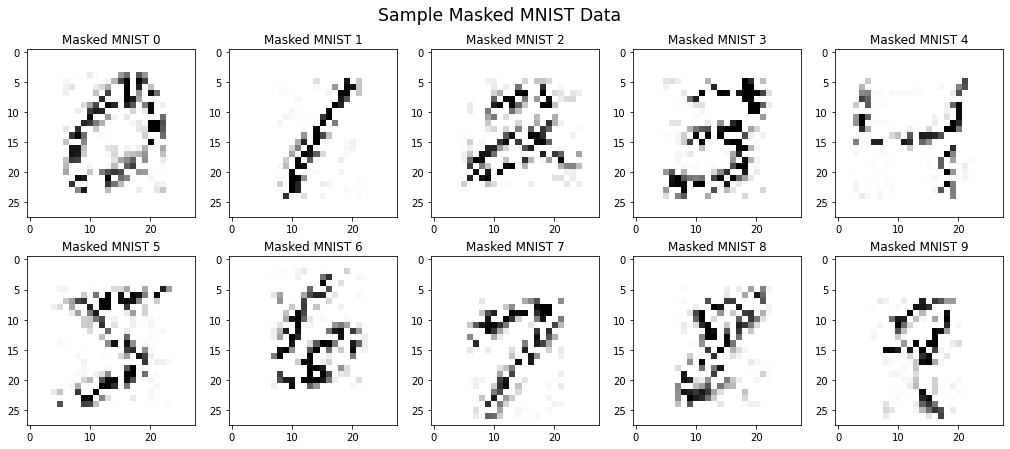

In [90]:
fig, ax = plt.subplots(2, 5, figsize=(17.5, 7))
for i in range(5):
    ax[0, i].imshow(X_subset_masked[y_subset == i][0].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax[0,i].set_title(r'Masked MNIST {}'.format(i))
    ax[1, i].imshow(X_subset_masked[y_subset == i+5][0].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax[1,i].set_title(r'Masked MNIST {}'.format(i+5))
fig.suptitle(r'Sample Masked MNIST Data',y=0.96,size='xx-large')
plt.show()

In [63]:
X_train_masked, X_test_masked = X_subset_masked[:n_train], X_subset_masked[-n_train:]

model = LogisticRegression(C=1., penalty='l2', solver='saga', tol=0.1)
model.fit(X_train_masked, y_train)
acc_train_masked = model.score(X_train_masked, y_train)
acc_test_masked = model.score(X_test_masked, y_test)
display(Markdown(r'Our trained classifier correctly classifies ' +
                 r'{:.2f}% of our masked training data.'.format(100*acc_train_masked)))
display(Markdown(r'Our trained classifier correctly classifies ' +
                 r'{:.2f}% of our masked test data.'.format(100*acc_test_masked)))

Our trained classifier correctly classifies 93.93% of our masked training data.

Our trained classifier correctly classifies 81.07% of our masked test data.

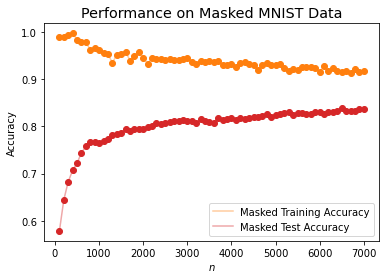

In [102]:
ns = [100*(i+1) for i in range(70)]
trains_m = np.zeros(70)
tests_m = np.zeros(70)
for i, n in enumerate(ns):
    X_tr, y_tr = X_subset_masked[:n], y_subset[:n]
    model = LogisticRegression(C=1., penalty='l2', solver='saga', tol=0.1)
    model.fit(X_tr, y_tr)
    trains_m[i] = model.score(X_tr, y_tr)
    tests_m[i] = model.score(X_test_masked, y_test) 
    
plt.plot(ns,trains_m,label=r'Masked Training Accuracy', alpha=0.4, color='C1')
plt.scatter(ns,trains_m,color='C1')
plt.plot(ns,tests_m,label=r'Masked Test Accuracy', alpha=0.4, color='C3')
plt.scatter(ns,tests_m,color='C3')
plt.xlabel(r'$n$')
plt.ylabel(r'Accuracy')
plt.title(r'Performance on Masked MNIST Data',size='x-large')
plt.legend()
plt.show()

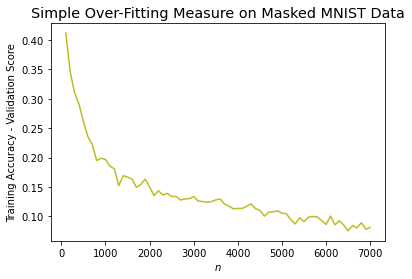

In [103]:
diffs_m = trains_m - tests_m
plt.plot(ns,diffs_m,color='C8')
plt.xlabel(r'$n$')
plt.ylabel(r'Training Accuracy - Validation Score')
plt.title(r'Simple Over-Fitting Measure on Masked MNIST Data',size='x-large')
plt.show()

In [65]:
X_subset_masked_rr = np.array([np.genfromtxt('./MNist_csv_50pcentMasked_RR/MNIST{}_RR.csv'.format(i),delimiter=',')
                               for i in range(10000)])
X_subset_masked_rr = X_subset_masked_rr.reshape((X_subset.shape[0], -1))

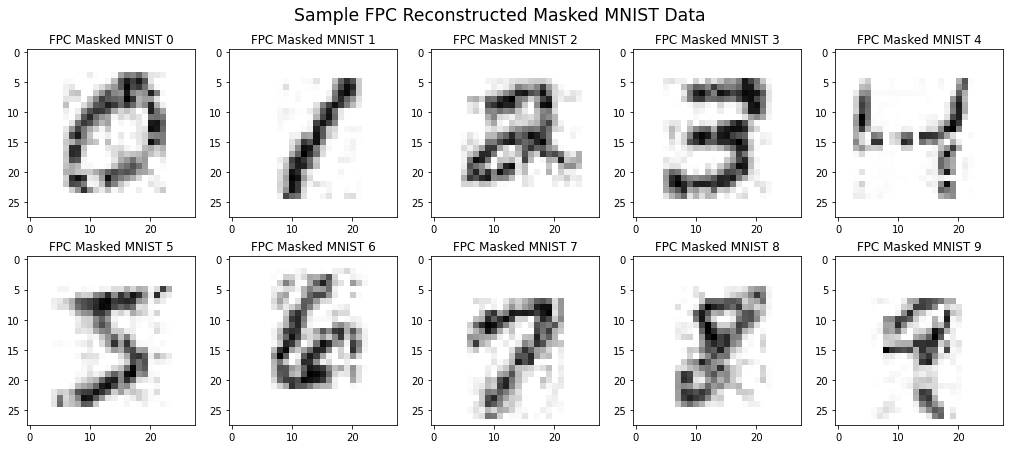

In [93]:
fig, ax = plt.subplots(2, 5, figsize=(17.5, 7))
for i in range(5):
    ax[0, i].imshow(X_subset_masked_rr[y_subset == i][0].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax[0,i].set_title(r'FPC Masked MNIST {}'.format(i))
    ax[1, i].imshow(X_subset_masked_rr[y_subset == i+5][0].reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax[1,i].set_title(r'FPC Masked MNIST {}'.format(i+5))
fig.suptitle(r'Sample FPC Reconstructed Masked MNIST Data',y=0.96,size='xx-large')
plt.show()

In [67]:
X_train_masked_rr, X_test_masked_rr = X_subset_masked_rr[:n_train], X_subset_masked_rr[-n_train:]

model = LogisticRegression(C=1., penalty='l2', solver='saga', tol=0.1)
model.fit(X_train_masked_rr, y_train)
acc_train_masked_rr = model.score(X_train_masked_rr, y_train)
acc_test_masked_rr = model.score(X_test_masked_rr, y_test)
display(Markdown(r'Our trained classifier correctly classifies ' +
                 r'{:.2f}% of our rank-reduced masked training data.'.format(100*acc_train_masked_rr)))
display(Markdown(r'Our trained classifier correctly classifies ' +
                 r'{:.2f}% of our rank-reduced masked test data.'.format(100*acc_test_masked_rr)))

Our trained classifier correctly classifies 92.20% of our rank-reduced masked training data.

Our trained classifier correctly classifies 85.43% of our rank-reduced masked test data.

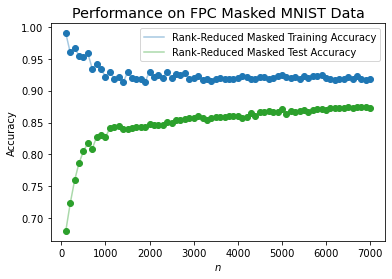

In [111]:
ns = [100*(i+1) for i in range(70)]
trains_mrr = np.zeros(70)
tests_mrr = np.zeros(70)
for i, n in enumerate(ns):
    X_tr, y_tr = X_subset_masked_rr[:n], y_subset[:n]
    model = LogisticRegression(C=1., penalty='l2', solver='saga', tol=0.1)
    model.fit(X_tr, y_tr)
    trains_mrr[i] = model.score(X_tr, y_tr)
    tests_mrr[i] = model.score(X_test_masked_rr, y_test)
    
plt.plot(ns,trains_mrr,label=r'Rank-Reduced Masked Training Accuracy', alpha=0.4, color='C0')
plt.scatter(ns,trains_mrr,color='C0')
plt.plot(ns,tests_mrr,label=r'Rank-Reduced Masked Test Accuracy', alpha=0.4, color='C2')
plt.scatter(ns,tests_mrr,color='C2')
plt.xlabel(r'$n$')
plt.ylabel(r'Accuracy')
plt.legend()
plt.title(r'Performance on FPC Masked MNIST Data',size='x-large')
plt.show()

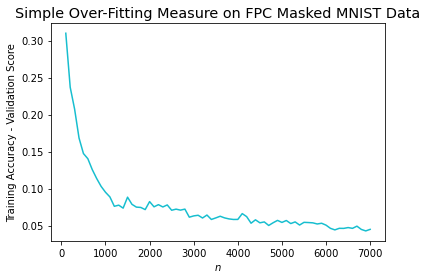

In [112]:
diffs_mrr = trains_mrr - tests_mrr
plt.plot(ns,diffs_mrr,color='C9')
plt.xlabel(r'$n$')
plt.ylabel(r'Training Accuracy - Validation Score')
plt.title(r'Simple Over-Fitting Measure on FPC Masked MNIST Data',size='x-large')
plt.show()

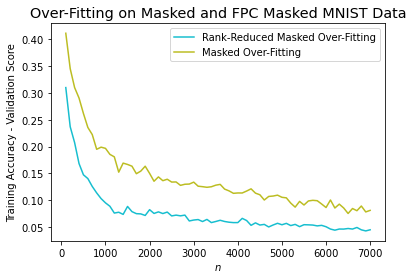

In [119]:
plt.plot(ns,diffs_mrr,label=r'Rank-Reduced Masked Over-Fitting',color='C9')
plt.plot(ns,diffs_m,label=r'Masked Over-Fitting',color='C8')
plt.xlabel(r'$n$')
plt.ylabel(r'Training Accuracy - Validation Score')
plt.title(r'Over-Fitting on Masked and FPC Masked MNIST Data',size='x-large')
plt.legend()
plt.show()

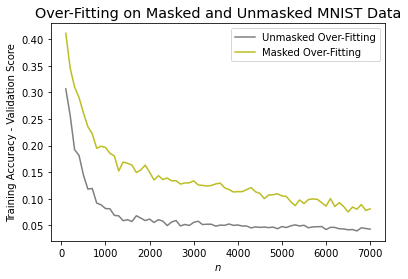

In [120]:
plt.plot(ns,diffs,label=r'Unmasked Over-Fitting',color='C7')
plt.plot(ns,diffs_m,label=r'Masked Over-Fitting',color='C8')
plt.xlabel(r'$n$')
plt.ylabel(r'Training Accuracy - Validation Score')
plt.title(r'Over-Fitting on Masked and Unmasked MNIST Data',size='x-large')
plt.legend()
plt.show()

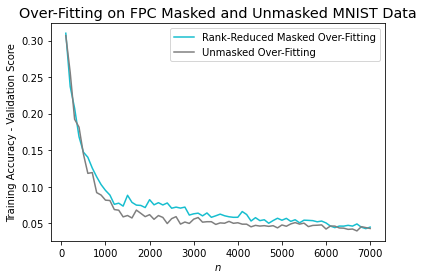

In [121]:
plt.plot(ns,diffs_mrr,label=r'Rank-Reduced Masked Over-Fitting',color='C9')
plt.plot(ns,diffs,label=r'Unmasked Over-Fitting',color='C7')
plt.xlabel(r'$n$')
plt.ylabel(r'Training Accuracy - Validation Score')
plt.title(r'Over-Fitting on FPC Masked and Unmasked MNIST Data',size='x-large')
plt.legend()
plt.show()

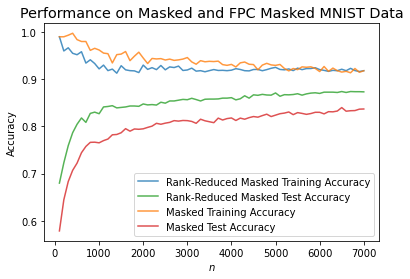

In [113]:
plt.plot(ns,trains_mrr,label=r'Rank-Reduced Masked Training Accuracy', alpha=0.8, color='C0')
#plt.scatter(ns,trains_mrr,color='C0')
plt.plot(ns,tests_mrr,label=r'Rank-Reduced Masked Test Accuracy', alpha=0.8, color='C2')
#plt.scatter(ns,tests_mrr,color='C2')
plt.plot(ns,trains_m,label=r'Masked Training Accuracy', alpha=0.8, color='C1')
#plt.scatter(ns,trains_m,color='C1')
plt.plot(ns,tests_m,label=r'Masked Test Accuracy', alpha=0.8, color='C3')
#plt.scatter(ns,tests_m,color='C3')
plt.xlabel(r'$n$')
plt.ylabel(r'Accuracy')
plt.title(r'Performance on Masked and FPC Masked MNIST Data',size='x-large')
plt.legend()
plt.show()

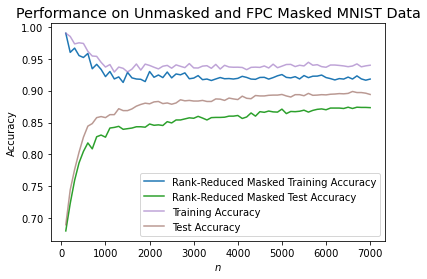

In [116]:
plt.plot(ns,trains_mrr,label=r'Rank-Reduced Masked Training Accuracy', alpha=1, color='C0')
#plt.scatter(ns,trains_mrr,color='C0')
plt.plot(ns,tests_mrr,label=r'Rank-Reduced Masked Test Accuracy', alpha=1, color='C2')
#plt.scatter(ns,tests_mrr,color='C2')
plt.plot(ns,trains,label=r'Training Accuracy', alpha=0.6, color='C4')
#plt.scatter(ns,trains,color='C4')
plt.plot(ns,tests,label=r'Test Accuracy', alpha=0.6, color='C5')
#plt.scatter(ns,tests,color='C5')
plt.xlabel(r'$n$')
plt.ylabel(r'Accuracy')
plt.legend()
plt.title(r'Performance on Unmasked and FPC Masked MNIST Data', size='x-large')
plt.show()

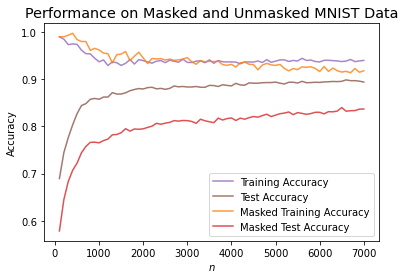

In [117]:
plt.plot(ns,trains,label=r'Training Accuracy', alpha=0.8, color='C4')
#plt.scatter(ns,trains_mrr,color='C0')
plt.plot(ns,tests,label=r'Test Accuracy', alpha=0.8, color='C5')
#plt.scatter(ns,tests_mrr,color='C2')
plt.plot(ns,trains_m,label=r'Masked Training Accuracy', alpha=0.8, color='C1')
#plt.scatter(ns,trains_m,color='C1')
plt.plot(ns,tests_m,label=r'Masked Test Accuracy', alpha=0.8, color='C3')
#plt.scatter(ns,tests_m,color='C3')
plt.xlabel(r'$n$')
plt.ylabel(r'Accuracy')
plt.title(r'Performance on Masked and Unmasked MNIST Data',size='x-large')
plt.legend()
plt.show()